In [29]:
import pandas as pd 
from pandas import json_normalize
import json
from dataprep.eda import create_report
import featuretools as ft

from featuretools.selection import (
    remove_highly_correlated_features,
    remove_highly_null_features,
    remove_single_value_features,
)


In [30]:
# pip install graphviz

In [31]:
with open("../data/raw/lots.json", "r") as read_lots:
    lots_data = json.load(read_lots)

lots_df = json_normalize(lots_data)
lots_df['createdAt.$date']= pd.to_datetime(lots_df['createdAt.$date'])
lots_df['createdAt.$date']= pd.to_datetime(lots_df['createdAt.$date'].dt.strftime('%m/%d/%Y'))

In [32]:
df = lots_df.explode('articles')
df.articles = df.articles.fillna({i: {} for i in df.index})

# use json_normalize
df_articles = pd.merge(df, pd.json_normalize(df.articles),left_on='_id', right_on='lotId', how='left')

In [33]:
df_articles.columns

Index(['_id_x', 'title', 'sellerId_x', 'bottles', 'articles', 'bottlesTotal',
       'archived_x', 'status', 'roomId', 'positionInRoom', 'bids', 'number',
       'minimumPrice.amount', 'minimumPrice.currency', 'createdAt.$date_x',
       'seller._id', 'seller.username', 'seller.firstname', 'seller.lastname',
       'seller.userfullname', 'seller.country', 'lowValuation.amount',
       'lowValuation.currency', 'highValuation.amount',
       'highValuation.currency', 'shippingFees.countryOfExpedition',
       'shippingFees.area1.amount', 'shippingFees.area1.currency',
       'shippingFees.area2.amount', 'shippingFees.area2.currency',
       'shippingFees.area3.amount', 'shippingFees.area3.currency',
       'shippingFees.area4.amount', 'shippingFees.area4.currency', 'room._id',
       'room.label', 'room.createdAt.$date', 'room.startingTime.$date',
       'room.endingTime.$date', 'room.lotsTotal', 'room.maxEndingTime.$date',
       'room.closed', '_id_y', 'designationText', 'wineyard', 'v

In [34]:
es = ft.EntitySet(id="lots_data")

In [36]:
es = es.entity_from_dataframe(entity_id="lots",
                                  dataframe=df_articles,
                                  index="lotid",
                                  time_index="createdAt.$date_x")

/home/soulaimen/anaconda3/lib/python3.8/site-packages/featuretools/entityset/entity.py:462: UserWarning: index lotid not found in dataframe, creating new integer column
  warnings.warn("index {} not found in dataframe, creating new "


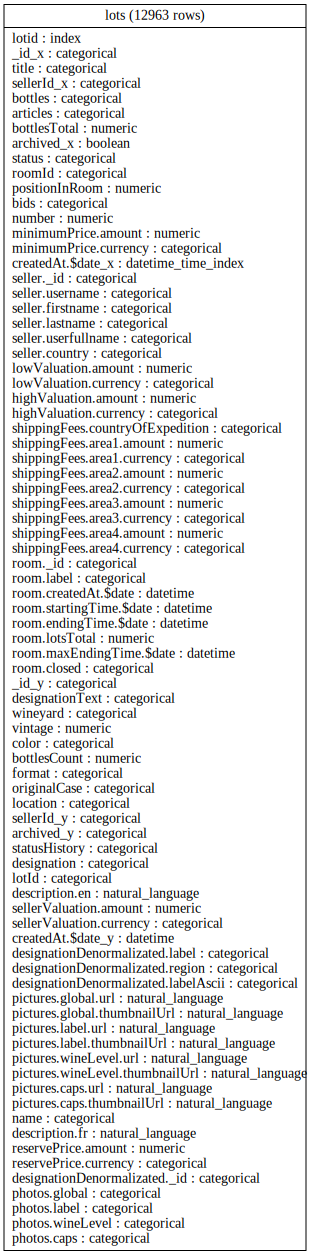

In [37]:
es.plot()

In [40]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                          target_entity="lots",
                                          agg_primitives=["count"],
                                          trans_primitives=["month", "year"],
                                          max_depth=1)
feature_matrix

/home/soulaimen/anaconda3/lib/python3.8/site-packages/featuretools/synthesis/dfs.py:307: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  agg_primitives: ['count']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible variable types for the primitive were found in the data.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


,_id_x,title,sellerId_x,bottles,articles,bottlesTotal,archived_x,status,roomId,positionInRoom,...,MONTH(room.createdAt.$date),MONTH(room.endingTime.$date),MONTH(room.maxEndingTime.$date),MONTH(room.startingTime.$date),YEAR(createdAt.$date_x),YEAR(createdAt.$date_y),YEAR(room.createdAt.$date),YEAR(room.endingTime.$date),YEAR(room.maxEndingTime.$date),YEAR(room.startingTime.$date)
lotid,,,,,,,,,,,,,,,,,,,,,
5290,SqKe28P8Qee793mxv,"Château Cheval Blanc, Saint-Émilion, 1990",tFdhDr2gRyj554YK4,[kjh2Bu4unZtMmaxZY],"{'_id': 'kjh2Bu4unZtMmaxZY', 'designation': 'Q...",3,True,created,NaN,NaN,...,NaN,NaN,NaN,NaN,2016,2016.0,NaN,NaN,NaN,NaN
3475,KdPgNZSdHAhh5oYZ9,"Château d'Yquem, Sauternes, 2002",Xg9zmpCJPutbu7MTN,[hY5JBR8gxGMr42S4J],"{'_id': 'hY5JBR8gxGMr42S4J', 'designation': 'z...",1,True,created,NaN,NaN,...,NaN,NaN,NaN,NaN,2016,2016.0,NaN,NaN,NaN,NaN
3948,NfN4Pgis7ozcyLHz7,"Château d'Yquem, Sauternes, Lur-Saluces, 1991",Xg9zmpCJPutbu7MTN,[jpqxDPS6Li799bA7A],"{'_id': 'jpqxDPS6Li799bA7A', 'designation': 'z...",1,True,created,NaN,NaN,...,NaN,NaN,NaN,NaN,2016,2016.0,NaN,NaN,NaN,NaN
5327,S2Fwu88F7x7WEWBzh,"lur saluces, chateau d'yquem, Sauternes, 1932",RnrLjBw7FENumavfZ,[wZDW4xZKrTFTWandg],"{'_id': 'wZDW4xZKrTFTWandg', 'designation': 'z...",1,True,created,NaN,NaN,...,NaN,NaN,NaN,NaN,2016,2016.0,NaN,NaN,NaN,NaN
9348,tgsFTM5XyDWyZKJ6K,"Veuve Clicquot, Champagne, 1947",nGyCm42aTwsS2pEws,[L4WQJEi2mrRW4aBXq],"{'_id': 'L4WQJEi2mrRW4aBXq', 'designation': 'B...",4,True,created,NaN,NaN,...,NaN,NaN,NaN,NaN,2016,2016.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12958,qo448PiF5SzbFasDN,"Vacqueyras, Vacqueyras, Château des tours, 2005",o279y9fWM6HzS6QSG,[GAq7Wi75zqLk49PBP],"{'_id': 'GAq7Wi75zqLk49PBP', 'designationText'...",1,False,created,NaN,NaN,...,NaN,NaN,NaN,NaN,2021,2021.0,NaN,NaN,NaN,NaN
12959,SXZHQWkRBtwDaBf6w,"Côtes-du-Rhône, Château des Tours, 2015",QzvDnXDTrPHmwzAAX,[NJfgYfa4K38fdaY7T],"{'_id': 'NJfgYfa4K38fdaY7T', 'designationText'...",1,False,created,NaN,NaN,...,NaN,NaN,NaN,NaN,2021,2021.0,NaN,NaN,NaN,NaN
12960,w6dMagZXzXyBuCXAb,"Meursault, les grands charrons, BOISSON VADOT,...",o279y9fWM6HzS6QSG,[zhS827BGtLPakC6DE],"{'_id': 'zhS827BGtLPakC6DE', 'designationText'...",1,False,created,NaN,NaN,...,NaN,NaN,NaN,NaN,2021,2021.0,NaN,NaN,NaN,NaN


In [28]:
 ft.describe_feature(feature_defs[11])

'The time since the previous instance of the "createdAt.$date_x".'

In [41]:
ft.selection.remove_highly_null_features(feature_matrix)

,_id_x,title,sellerId_x,bottles,articles,bottlesTotal,archived_x,status,roomId,positionInRoom,...,MONTH(room.createdAt.$date),MONTH(room.endingTime.$date),MONTH(room.maxEndingTime.$date),MONTH(room.startingTime.$date),YEAR(createdAt.$date_x),YEAR(createdAt.$date_y),YEAR(room.createdAt.$date),YEAR(room.endingTime.$date),YEAR(room.maxEndingTime.$date),YEAR(room.startingTime.$date)
lotid,,,,,,,,,,,,,,,,,,,,,
5290,SqKe28P8Qee793mxv,"Château Cheval Blanc, Saint-Émilion, 1990",tFdhDr2gRyj554YK4,[kjh2Bu4unZtMmaxZY],"{'_id': 'kjh2Bu4unZtMmaxZY', 'designation': 'Q...",3,True,created,NaN,NaN,...,NaN,NaN,NaN,NaN,2016,2016.0,NaN,NaN,NaN,NaN
3475,KdPgNZSdHAhh5oYZ9,"Château d'Yquem, Sauternes, 2002",Xg9zmpCJPutbu7MTN,[hY5JBR8gxGMr42S4J],"{'_id': 'hY5JBR8gxGMr42S4J', 'designation': 'z...",1,True,created,NaN,NaN,...,NaN,NaN,NaN,NaN,2016,2016.0,NaN,NaN,NaN,NaN
3948,NfN4Pgis7ozcyLHz7,"Château d'Yquem, Sauternes, Lur-Saluces, 1991",Xg9zmpCJPutbu7MTN,[jpqxDPS6Li799bA7A],"{'_id': 'jpqxDPS6Li799bA7A', 'designation': 'z...",1,True,created,NaN,NaN,...,NaN,NaN,NaN,NaN,2016,2016.0,NaN,NaN,NaN,NaN
5327,S2Fwu88F7x7WEWBzh,"lur saluces, chateau d'yquem, Sauternes, 1932",RnrLjBw7FENumavfZ,[wZDW4xZKrTFTWandg],"{'_id': 'wZDW4xZKrTFTWandg', 'designation': 'z...",1,True,created,NaN,NaN,...,NaN,NaN,NaN,NaN,2016,2016.0,NaN,NaN,NaN,NaN
9348,tgsFTM5XyDWyZKJ6K,"Veuve Clicquot, Champagne, 1947",nGyCm42aTwsS2pEws,[L4WQJEi2mrRW4aBXq],"{'_id': 'L4WQJEi2mrRW4aBXq', 'designation': 'B...",4,True,created,NaN,NaN,...,NaN,NaN,NaN,NaN,2016,2016.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12958,qo448PiF5SzbFasDN,"Vacqueyras, Vacqueyras, Château des tours, 2005",o279y9fWM6HzS6QSG,[GAq7Wi75zqLk49PBP],"{'_id': 'GAq7Wi75zqLk49PBP', 'designationText'...",1,False,created,NaN,NaN,...,NaN,NaN,NaN,NaN,2021,2021.0,NaN,NaN,NaN,NaN
12959,SXZHQWkRBtwDaBf6w,"Côtes-du-Rhône, Château des Tours, 2015",QzvDnXDTrPHmwzAAX,[NJfgYfa4K38fdaY7T],"{'_id': 'NJfgYfa4K38fdaY7T', 'designationText'...",1,False,created,NaN,NaN,...,NaN,NaN,NaN,NaN,2021,2021.0,NaN,NaN,NaN,NaN
12960,w6dMagZXzXyBuCXAb,"Meursault, les grands charrons, BOISSON VADOT,...",o279y9fWM6HzS6QSG,[zhS827BGtLPakC6DE],"{'_id': 'zhS827BGtLPakC6DE', 'designationText'...",1,False,created,NaN,NaN,...,NaN,NaN,NaN,NaN,2021,2021.0,NaN,NaN,NaN,NaN


In [ ]:
report = create_report(df_articles, title='Auction articles report V1')
report.save(filename='lots_profiling_report_v1', to='../reports')

In [ ]:
.drop(
    columns=['articles', 'pictures.global.url','pictures.global.thumbnailUrl', 'pictures.label.url', 
             'pictures.label.thumbnailUrl', 'pictures.wineLevel.url','pictures.wineLevel.thumbnailUrl', 
             'pictures.caps.url', 'pictures.caps.thumbnailUrl', 'photos.global', 'photos.label', 'photos.wineLevel'
             ,'photos.caps', 'minimumPrice.currency', 'sellerId_x', 'seller.firstname', 'seller.lastname',
            'seller.userfullname', 'lowValuation.currency', 'highValuation.currency','shippingFees.countryOfExpedition',
           'shippingFees.area1.amount', 'shippingFees.area1.currency','shippingFees.area2.amount', 
            'shippingFees.area2.currency','shippingFees.area3.amount', 'shippingFees.area3.currency',
             'shippingFees.area4.amount', 'shippingFees.area4.currency','sellerId_y', 'archived_y','lotId',
            'description.en', 'sellerValuation.amount', 'sellerValuation.currency', 'designation', 'statusHistory'
             ,'designationDenormalizated.labelAscii', 'description.fr', 'reservePrice.currency', 'seller._id', 'seller.username', 'seller.country',
       'lowValuation.amount', 'highValuation.amount', 'room._id', 'room.label',
       'room.createdAt.$date', 'room.startingTime.$date',
       'room.endingTime.$date', 'room.lotsTotal', 'room.maxEndingTime.$date',
       'room.closed', '_id_y', 'designationText', 'wineyard', 'vintage',
       'color', 'bottlesCount', 'format', 'originalCase', 'location',
       'createdAt.$date_y', 'designationDenormalizated.label',
       'designationDenormalizated.region', 'name', 'reservePrice.amount',
       'designationDenormalizated._id'])